In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import Callback
import random 
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
# import seaborn as sns 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.resnet50 import ResNet50 
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
classification_model_path = 'models/model1.h5'
classification_model = tf.keras.models.load_model(classification_model_path)

I0000 00:00:1735664147.373895    4906 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1404 MB memory:  -> device: 0, name: NVIDIA GeForce MX350, pci bus id: 0000:01:00.0, compute capability: 6.1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


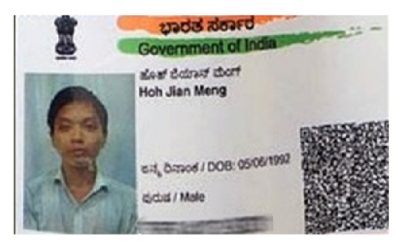

IndCard :  0.8134872
IndPass :  0.017296528
random :  0.16921638
Predicted class: IndCard with confidence: 0.81348717212677
false


In [6]:
img_path = "dataset/test/IndCard/8.png"

img = image.load_img(img_path, target_size=(500, 500))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

class_mapping = {
    0: 'IndCard',
    1: 'IndPass',
    2: 'random'
}

predictions = classification_model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
confidence = np.max(predictions)
predicted_class_label = class_mapping[predicted_class_index]


plt.figure(figsize=(5, 3))
plt.imshow(img, aspect='auto')
plt.axis('off')
plt.show()


for i in range(3):
    print(class_mapping[i], ": ", predictions[0][i])
print(f'Predicted class: {predicted_class_label} with confidence: {confidence}')

if predicted_class_label != "IndPass" :
    print ("false")
else:
    print("true")